In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv('1.03. Dummies.csv')
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [3]:
data = raw_data.copy()

In [4]:
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

In [5]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [8]:
x1 = data[['SAT', 'Attendance']]
y = data['GPA']

In [9]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.19e-15
Time:                        14:58:38   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

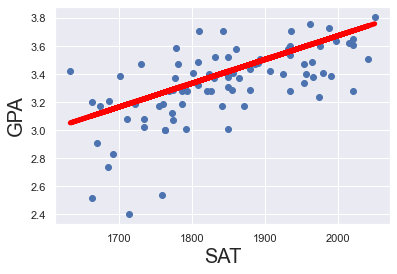

In [7]:
plt.scatter(x1,y)
yhat = 0.0017*x1+0.2750
fig = plt.plot(x1, yhat, lw=5, c='red', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [15]:
x1 = raw_data[['sex','sat_sum']]
y = raw_data['hs_gpa']

In [16]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hs_gpa   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     151.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           3.22e-58
Time:                        14:15:08   Log-Likelihood:                -672.52
No. Observations:                1000   AIC:                             1351.
Df Residuals:                     997   BIC:                             1366.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0052      0.127      7.910      0.000       0.756       1.255
sex            0.2400      0.030      7.871      0.000       0.180       0.300
sat_sum        0.0178      0.001     16.655      0.000       0.016       0.020
==============================================================================
Omnibus:                        9.411   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.328
Skew:                          -0.165   Prob(JB):                       0.0155
Kurtosis:                       2.698   Cond. No.                         890.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

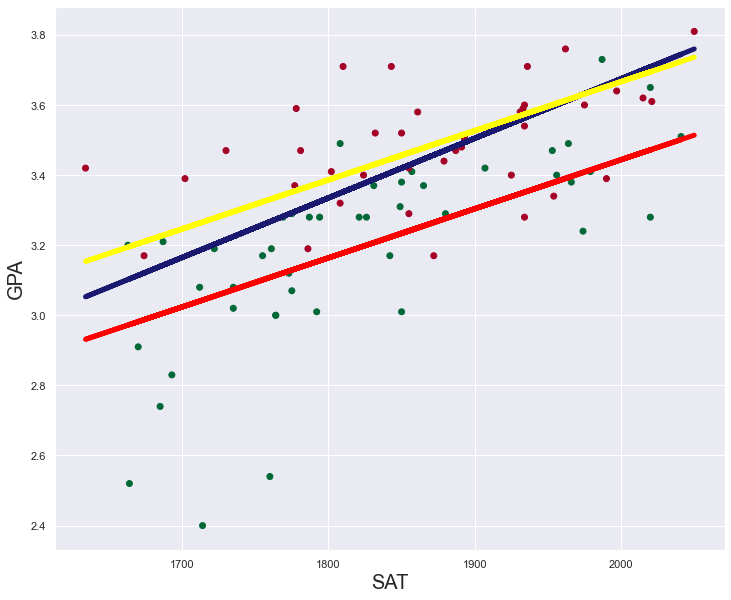

In [12]:
plt.figure(figsize=(12,10))
plt.scatter(data['SAT'],y, c=data['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439+0.0014*data['SAT']
yhat_yes = 0.8665+0.0014*data['SAT']
yhat = 0.0017*data['SAT']+0.275
fig = plt.plot(data['SAT'], yhat, lw=5, c='midnightblue', label='regression line')
fig = plt.plot(data['SAT'], yhat_no, lw=5, c='red', label='regression line male')
fig = plt.plot(data['SAT'], yhat_yes, lw=5, c='yellow', label='regression line female')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [13]:
new_data = pd.DataFrame({'const': 1, 'SAT': [1740, 1790], 'Attendance': [0,1]})
new_data

,const,SAT,Attendance
0,1,1740,0
1,1,1790,1


In [14]:
new_data.rename(index={0:'Rey', 1: 'Siya'})

,const,SAT,Attendance
Rey,1,1740,0
Siya,1,1790,1


In [15]:
predictions = results.predict(new_data)

In [16]:
predictions

0    3.079505
1    3.372139
dtype: float64

In [18]:
data1 = pd.read_csv('1.01. Simple linear regression.csv')

In [19]:
data1

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
x=data1['SAT']
y=data1['GPA']

In [23]:
x.shape

(84,)

In [24]:
y.shape

(84,)

In [25]:
x = x.values.reshape(-1,1)

In [27]:
x.shape

(84, 1)

In [28]:
reg = LinearRegression()

In [30]:
reg.fit(x,y)

LinearRegression()

In [31]:
reg.score(x,y)

0.40600391479679765

In [34]:
reg.coef_

array([0.00165569])

In [35]:
reg.intercept_

0.2750402996602803

##R-Squared

In [37]:
x1 = data[['SAT', 'Attendance']]
y1 = data['GPA']

In [39]:
reg.fit(x1,y1)

LinearRegression()

In [40]:
reg.score(x1,y1)

0.5654390486739878

In [44]:
x1.shape

(84, 2)

In [46]:
r2 = reg.score(x1,y1)
n = x1.shape[0]
p = x1.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [47]:
adjusted_r2

0.5547091486412468

### F-Statistics

In [48]:
from sklearn.feature_selection import f_regression

In [50]:
f_regression(x1,y1)

(array([56.04804786, 33.79842712]), array([7.19951844e-11, 1.13215865e-07]))

In [51]:
p_values = f_regression(x1,y1)[1]
p_values

array([7.19951844e-11, 1.13215865e-07])

In [52]:
p_values.round(3)

array([0., 0.])

## Standardization

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(x1)

StandardScaler()

In [56]:
x_scaled = scaler.transform(x1)
x_scaled

array([[-1.26338288, -0.93094934],
       [-1.74458431, -0.93094934],
       [-0.82067757, -0.93094934],
       [-1.54247971, -0.93094934],
       [-1.46548748, -0.93094934],
       [-1.68684014, -0.93094934],
       [-0.78218146, -0.93094934],
       [-0.78218146, -0.93094934],
       [-0.51270866, -0.93094934],
       [ 0.04548499, -0.93094934],
       [-1.06127829, -0.93094934],
       [-0.67631715, -0.93094934],
       [-1.06127829, -0.93094934],
       [-1.28263094, -0.93094934],
       [-0.6955652 , -0.93094934],
       [ 0.25721362,  1.07417231],
       [-0.86879772, -0.93094934],
       [-1.64834403,  1.07417231],
       [-0.03150724, -0.93094934],
       [-0.57045283,  1.07417231],
       [-0.81105355, -0.93094934],
       [-1.18639066, -0.93094934],
       [-1.75420834, -0.93094934],
       [-1.52323165, -0.93094934],
       [ 1.23886453, -0.93094934],
       [-0.18549169, -0.93094934],
       [-0.5608288 , -0.93094934],
       [-0.23361183, -0.93094934],
       [ 1.68156984,

In [57]:
reg.fit(x_scaled, y1)

LinearRegression()

In [58]:
reg.coef_

array([0.14544861, 0.1110377 ])

In [59]:
reg.intercept_

3.330238095238095

In [60]:
new_data = pd.DataFrame(data=[[1740,0], [1790,1]], columns=['SAT', 'Attendance'])
new_data

,SAT,Attendance
0,1740,0
1,1790,1


In [61]:
reg.predict(new_data)

/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([256.41081885, 263.79428703])

In [62]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.01315814, -0.93094934],
       [-0.53195672,  1.07417231]])

In [63]:
reg.predict(new_data_scaled)

array([3.07950518, 3.37213935])